A1.1

In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch as th  # MNIST images have dimension ( 1, 28, 28)
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_set = DataLoader(train_data, batch_size=1024, shuffle=True)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_set = DataLoader(test_data, batch_size=1024, shuffle=True)

a)

In [35]:
model = th.nn.Sequential(
    th.nn.Conv2d(1, 8, 5),  # ( 8, 24, 24)
    th.nn.ReLU(),  # ( 8, 24, 24)
    th.nn.MaxPool2d(2, 2),  # ( 8, 12, 12)
    th.nn.Conv2d(8, 16, 5),  # (16, 8, 8)
    th.nn.ReLU(),  # (16, 8, 8)
    th.nn.MaxPool2d(2, 2),  # (16, 4, 4)
    th.nn.Flatten(),  # (16 * 4 * 4)
    th.nn.Linear(256, 128),  # (128)
    th.nn.ReLU(),  # (128)
    th.nn.Linear(128, 32),  # ( 32)
    th.nn.ReLU(),  # ( 32)
    th.nn.Linear(32, 10),
)
criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.RMSprop(model.parameters(), lr=0.0005)

In [38]:
def train_test_model(model, optimizer, criterion, n_epochs, train_set, test_set, label_mod, acc_function, output_transform = lambda x: x):

    train_loss, train_acc = [], []
    test_loss, test_acc = [], []
    for e in range(n_epochs):
        print(f"Epoch {e}")
        losses, accuracies = [], []
        for x, y in train_set:
            pred_y = output_transform(model(x))
            optimizer.zero_grad()
            loss = criterion(pred_y, label_mod(y))
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            acc = acc_function(pred_y, y)
            accuracies.append(acc)
        print(f"Train loss: {np.mean(losses)}")
        print(f"Train acc: {np.mean(accuracies)}")
        train_loss.append(np.mean(losses))
        train_acc.append(np.mean(accuracies))

        # model.eval()
        losses, accuracies = [], []
        with th.no_grad():
            for x, y in test_set:
                pred_y = output_transform(model(x))
                loss = criterion(pred_y, label_mod(y))
                losses.append(loss.item())
                acc = acc_function(pred_y, y)
                accuracies.append(acc)
            print(f"Test loss: {np.mean(losses)}")
            print(f"Test acc: {np.mean(accuracies)}")
            test_loss.append(np.mean(losses))
            test_acc.append(np.mean(accuracies))
        # model.train()
    return train_loss, train_acc, test_loss, test_acc

In [39]:
acc1 = lambda pred_y, y: (pred_y.max(dim=-1)[1] == y).sum().item() / y.shape[0]

In [ ]:
tr_l, tr_a, ts_l, ts_a = train_test_model(
    model, optimizer, criterion, 10, train_set, test_set, lambda x: x, acc1
)

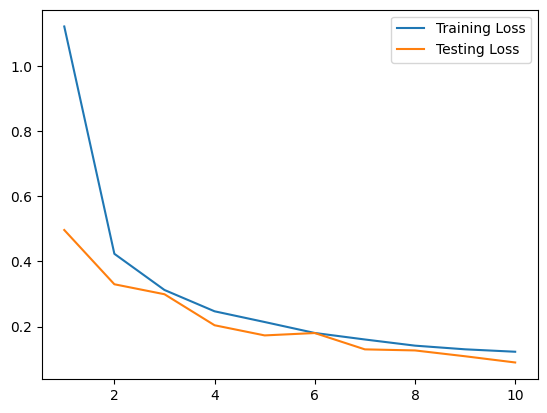

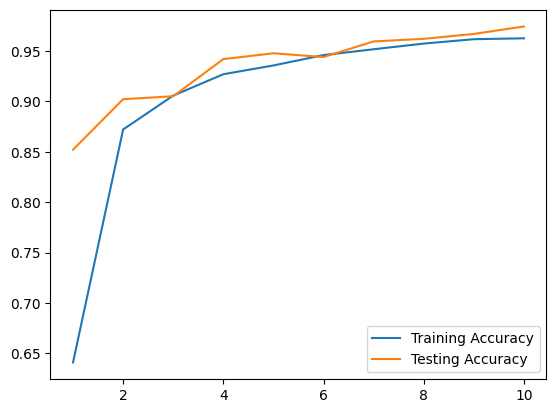

In [9]:
epochs = range(1, 11)
plt.plot(epochs, tr_l, label = "Training Loss")
plt.plot(epochs, ts_l, label = "Testing Loss")
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, tr_a, label = "Training Accuracy")
plt.plot(epochs, ts_a, label = "Testing Accuracy")
plt.legend()
plt.show()

b)

In [19]:
criterion2 = th.nn.MSELoss()

In [14]:
model2 = th.nn.Sequential(
    th.nn.Conv2d(1, 8, 5),  # ( 8, 24, 24)
    th.nn.ReLU(),  # ( 8, 24, 24)
    th.nn.MaxPool2d(2, 2),  # ( 8, 12, 12)
    th.nn.Conv2d(8, 16, 5),  # (16, 8, 8)
    th.nn.ReLU(),  # (16, 8, 8)
    th.nn.MaxPool2d(2, 2),  # (16, 4, 4)
    th.nn.Flatten(),  # (16 * 4 * 4)
    th.nn.Linear(256, 128),  # (128)
    th.nn.ReLU(),  # (128)
    th.nn.Linear(128, 32),  # ( 32)
    th.nn.ReLU(),  # ( 32)
    th.nn.Linear(32, 10),
)
optimizer2 = th.optim.RMSprop(model2.parameters(), lr=0.0005)

In [ ]:
tr_l2, tr_a2, ts_l2, ts_a2 = train_test_model(
    model2,
    optimizer2,
    criterion2,
    10,
    train_set,
    test_set,
    lambda x: th.nn.functional.one_hot(x).float(),
    acc1
)

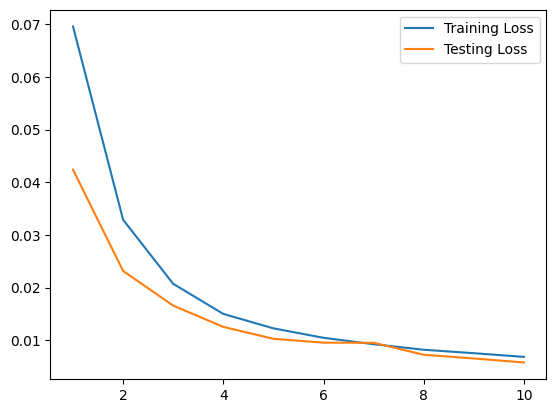

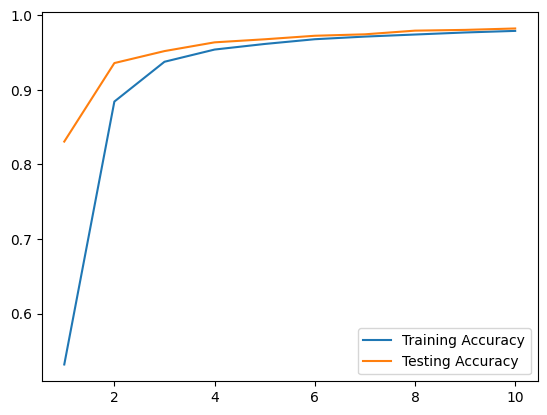

In [19]:
epochs = range(1, 11)
plt.plot(epochs, tr_l2, label = "Training Loss")
plt.plot(epochs, ts_l2, label = "Testing Loss")
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, tr_a2, label = "Training Accuracy")
plt.plot(epochs, ts_a2, label = "Testing Accuracy")
plt.legend()
plt.show()

c)

In [26]:
model3 = th.nn.Sequential(
    th.nn.Conv2d(1, 8, 5),  # ( 8, 24, 24)
    th.nn.ReLU(),  # ( 8, 24, 24)
    th.nn.MaxPool2d(2, 2),  # ( 8, 12, 12)
    th.nn.Conv2d(8, 16, 5),  # (16, 8, 8)
    th.nn.ReLU(),  # (16, 8, 8)
    th.nn.MaxPool2d(2, 2),  # (16, 4, 4)
    th.nn.Flatten(),  # (16 * 4 * 4)
    th.nn.Linear(256, 128),  # (128)
    th.nn.ReLU(),  # (128)
    th.nn.Linear(128, 32),  # ( 32)
    th.nn.ReLU(),  # ( 32)
    th.nn.Linear(32, 1),
)
optimizer3 = th.optim.RMSprop(model3.parameters(), lr=0.0005)

In [27]:
acc2 = lambda pred_y, y: (th.round(pred_y[:,0]) == y).sum().item() / y.shape[0]

In [ ]:
tr_l3, tr_a3, ts_l3, ts_a3 = train_test_model(
    model3,
    optimizer3,
    criterion2,
    50,
    train_set,
    test_set,
    lambda x: x.unsqueeze(dim=1).float(),
    acc2,
)

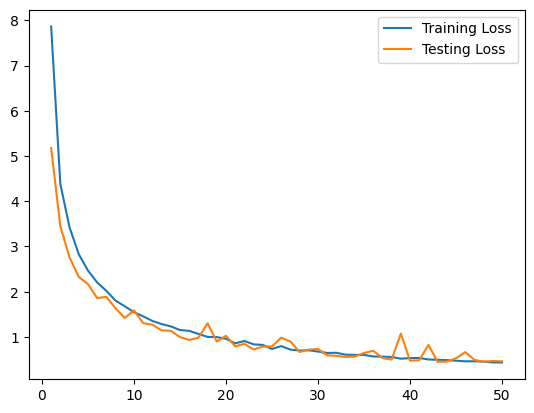

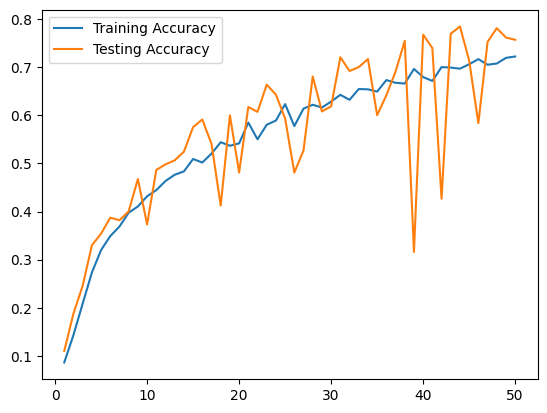

In [29]:
epochs = range(1, 51)
plt.plot(epochs, tr_l3, label = "Training Loss")
plt.plot(epochs, ts_l3, label = "Testing Loss")
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, tr_a3, label = "Training Accuracy")
plt.plot(epochs, ts_a3, label = "Testing Accuracy")
plt.legend()
plt.show()

d)

In [41]:
model4 = th.nn.Sequential(
    th.nn.Conv2d(1, 8, 5),  # ( 8, 24, 24)
    th.nn.ReLU(),  # ( 8, 24, 24)
    th.nn.MaxPool2d(2, 2),  # ( 8, 12, 12)
    th.nn.Conv2d(8, 16, 5),  # (16, 8, 8)
    th.nn.ReLU(),  # (16, 8, 8)
    th.nn.MaxPool2d(2, 2),  # (16, 4, 4)
    th.nn.Flatten(),  # (16 * 4 * 4)
    th.nn.Linear(256, 128),  # (128)
    th.nn.ReLU(),  # (128)
    th.nn.Linear(128, 32),  # ( 32)
    th.nn.ReLU(),  # ( 32)
    th.nn.Linear(32, 1),
)
optimizer4 = th.optim.RMSprop(model4.parameters(), lr=0.0005)

In [42]:
output_transform4 = lambda x: th.add(th.multiply(x, 4.5), 4.5)

In [ ]:
tr_l4, tr_a4, ts_l4, ts_a4 = train_test_model(
    model4,
    optimizer4,
    criterion2,
    50,
    train_set,
    test_set,
    lambda x: x.unsqueeze(dim=1).float(),
    acc2,
    output_transform4,
)

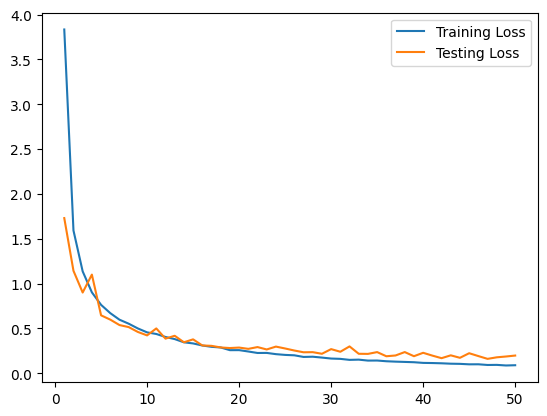

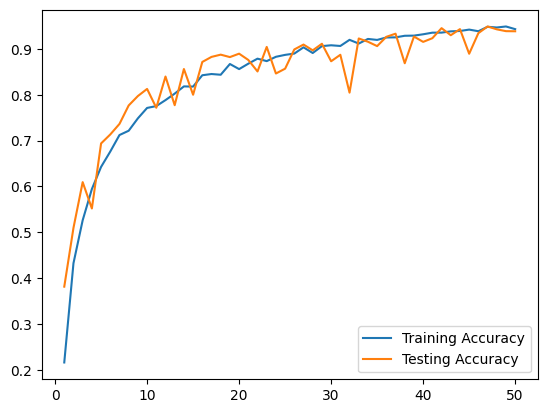

In [44]:
epochs = range(1, 51)
plt.plot(epochs, tr_l4, label = "Training Loss")
plt.plot(epochs, ts_l4, label = "Testing Loss")
plt.legend()
plt.show()
plt.clf()
plt.plot(epochs, tr_a4, label = "Training Accuracy")
plt.plot(epochs, ts_a4, label = "Testing Accuracy")
plt.legend()
plt.show()

The model converges much more quickly and the end accuracy is higher. Thanks to linear scaling, the range of accepted answers from the model changes from (0, 9) to (-1, 1). This reduces the required weights in the model and increases stability.